# **对Github Dataset数据集的处理**

## 加载所需要的python库和数据集

In [2]:
# 将python中读取文件的库加载进来，并使用简称来使用
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# 忽略警告
warnings.filterwarnings('ignore')
# 加载下载在本地的github数据集
github_data = pd.read_csv('G://archive//github_dataset.csv')
repository_data = pd.read_csv('G://archive//repository_data.csv')

## 数据摘要
### *数据集的形状*

In [3]:
print("github_dataset.csv的形状：", github_data.shape)
print("repository_data.csv的形状：", repository_data.shape)

github_dataset.csv的形状： (1052, 7)
repository_data.csv的形状： (2917951, 10)


### *获取两个数据集文件的属性名称，同时给出几行数据判断各属性是数值属性还是标称属性*

In [4]:
# 获取属性名称
column_names1 = github_data.columns
print("github_dataset文件的属性名称：", column_names1)
# 读取前三行数据
data1 = pd.read_csv('G://archive//github_dataset.csv', nrows=3)
print("CSV文件的前三行数据：")
print(data1)

column_names2 = repository_data.columns
print("repository_dataset文件的属性名称：", column_names2)
# 读取前三行数据
data2 = pd.read_csv('G://archive//repository_data.csv', nrows=3)
print("CSV文件的前三行数据：")
print(data2)

github_dataset文件的属性名称： Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')
CSV文件的前三行数据：
                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
repository_dataset文件的属性名称： Index(['name', 'stars_count', 'forks_count', 'watchers', 'pull_requests',
       'primary_language', 'languages_used', 'commit_count', 'created_at',
       'licence'],
      dtype='object')
CSV文件的前三行数据：
                     name  stars_count  forks_count  watchers  pull_requests  \
0            freeCodeCamp       359805        30814  

### *数据集的标称属性和数值属性*
#### 首先处理github_dataset数据集的标称属性和数值属性
<p>使用value_counts函数得到GitHub_dataset数据集的标称属性各可能取值的出现频数</p>

In [5]:
# 标称属性的频数统计和缺失值统计
print("repositories标称属性频数统计：")
print(github_data['repositories'].value_counts())
print("\nlanguage标称属性频数统计：")
print(github_data['language'].value_counts())

print("\nrepositories标称属性缺失值个数：")
print(github_data['repositories'].isnull().sum())
print("\nlanguage标称属性性缺失值个数：")
print(github_data['language'].isnull().sum())

repositories标称属性频数统计：
repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: count, Length: 972, dtype: int64

language标称属性频数统计：
language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift     

<p>使用describe函数得到GitHub_dataset数据集的数值属性的五数概括同时使用isnull函数判断数值属性是否缺失并利用sum函数计算缺失值总数得到各数值属性的缺失值个数</p>

In [6]:
# 数值属性的五数概括及缺失值个数
print("\nstars_count数值属性五数概括：")
print(github_data['stars_count'].describe())
print("\nforks_count数值属性五数概括：")
print(github_data['forks_count'].describe())
print("\nissues_count数值属性五数概括：")
print(github_data['issues_count'].describe())
print("\npull_requests数值属性五数概括：")
print(github_data['pull_requests'].describe())
print("\ncontributors数值属性五数概括：")
print(github_data['contributors'].describe())

print("\nstars_count数值属性缺失值个数：")
print(github_data['stars_count'].isnull().sum())
print("\nforks_count数值属性缺失值个数：")
print(github_data['forks_count'].isnull().sum())
print("\nissues_count数值属性缺失值个数：")
print(github_data['issues_count'].isnull().sum())
print("\npull_requests数值属性缺失值个数：")
print(github_data['pull_requests'].isnull().sum())
print("\ncontributors数值属性五数概括：")
print(github_data['contributors'].isnull().sum())


stars_count数值属性五数概括：
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64

forks_count数值属性五数概括：
count    1052.000000
mean       53.884981
std       127.699729
min         0.000000
25%         1.000000
50%         6.000000
75%        38.250000
max       973.000000
Name: forks_count, dtype: float64

issues_count数值属性五数概括：
count    1052.000000
mean        8.656844
std        32.445154
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       612.000000
Name: issues_count, dtype: float64

pull_requests数值属性五数概括：
count    1052.000000
mean        4.374525
std        27.913732
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       567.000000
Name: pull_requests, dtype: float64

contributors数值属性五数概括：
count    1052.000000
mean        8.364068
std        37.511807
min         

## 数据可视化

### 使用直方图和盒图分别对五种数值属性进行数据分布展示

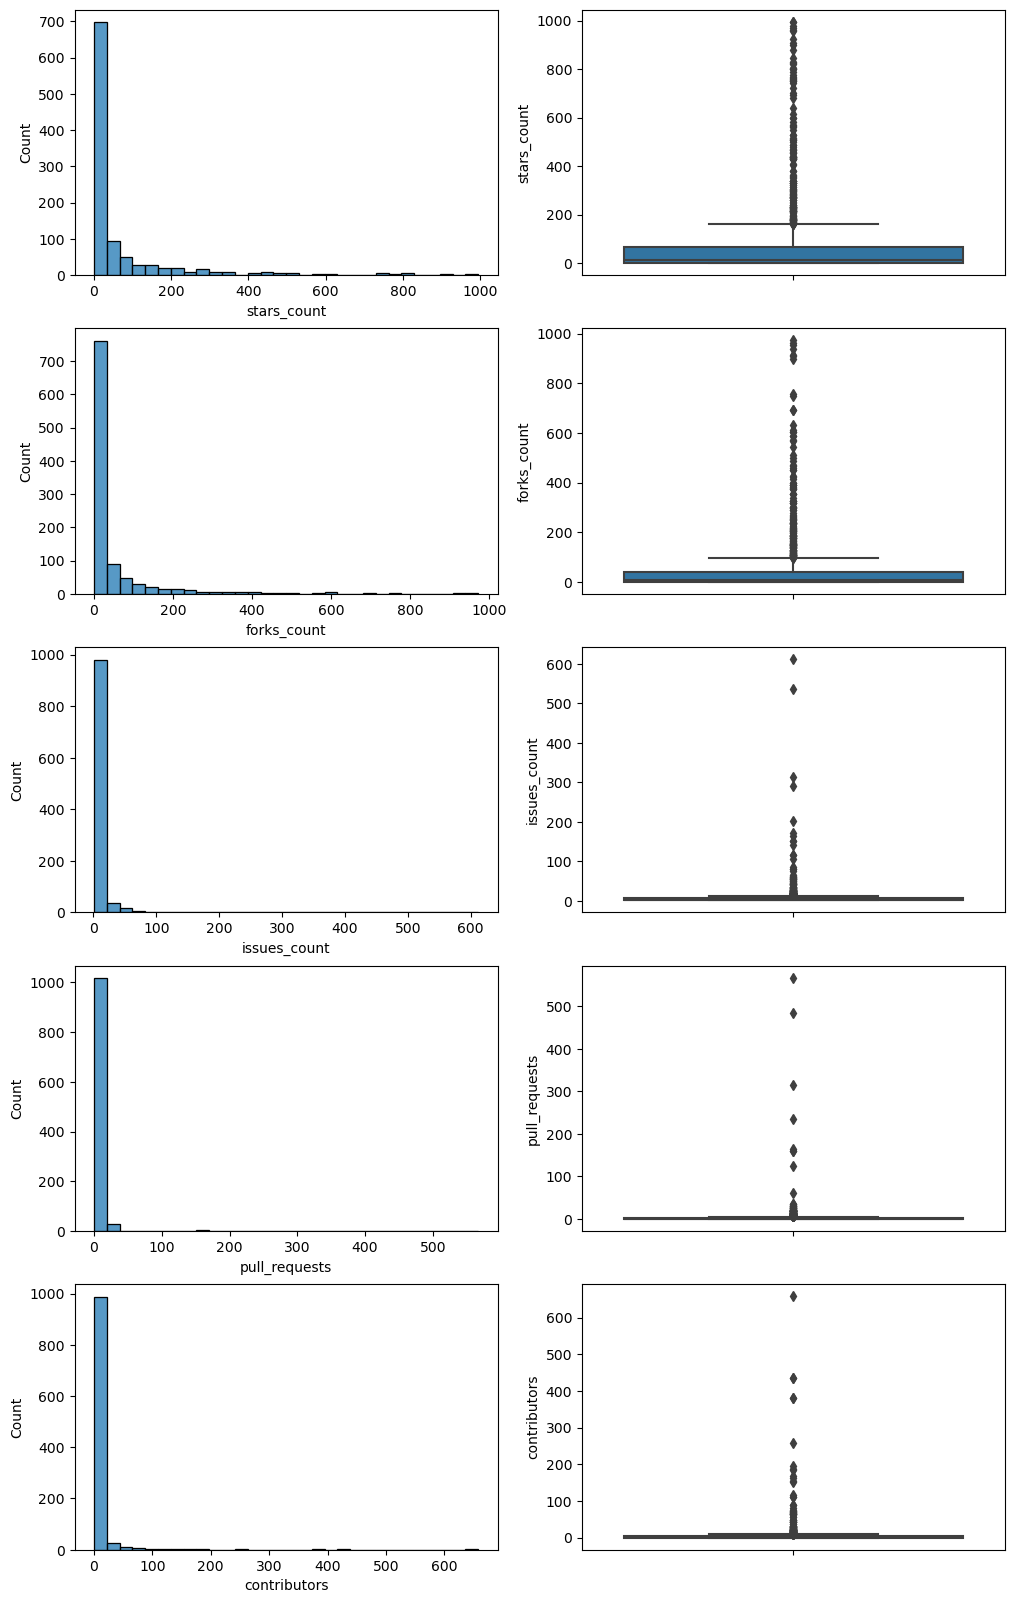

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# 可视化
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
sns.histplot(ax=axes[0, 0], data=github_data, x='stars_count', bins=30)
sns.boxplot(ax=axes[0, 1], data=github_data, y='stars_count')
sns.histplot(ax=axes[1, 0], data=github_data, x='forks_count', bins=30)
sns.boxplot(ax=axes[1, 1], data=github_data, y='forks_count')
sns.histplot(ax=axes[2, 0], data=github_data, x='issues_count', bins=30)
sns.boxplot(ax=axes[2, 1], data=github_data, y='issues_count')
sns.histplot(ax=axes[3, 0], data=github_data, x='pull_requests', bins=30)
sns.boxplot(ax=axes[3, 1], data=github_data, y='pull_requests')
sns.histplot(ax=axes[4, 0], data=github_data, x='contributors', bins=30)
sns.boxplot(ax=axes[4, 1], data=github_data, y='contributors')
plt.show()

#### 之后处理repository_dataset数据集的标称属性和数值属性

In [8]:
# 标称属性的频数统计和缺失值统计
print("name标称属性频数统计：")
print(repository_data['name'].value_counts())
print("\nprimary_language标称属性频数统计：")
print(repository_data['primary_language'].value_counts())
print("\nlanguages_used标称属性频数统计：")
print(repository_data['languages_used'].value_counts())
print("\ncreated_at标称属性频数统计：")
print(repository_data['created_at'].value_counts())
print("\nlicence标称属性频数统计：")
print(repository_data['licence'].value_counts())

print("\nname标称属性缺失值个数：")
print(repository_data['name'].isnull().sum())
print("\nprimary_language标称属性性缺失值个数：")
print(repository_data['primary_language'].isnull().sum())
print("\nlanguages_used标称属性缺失值个数：")
print(repository_data['languages_used'].isnull().sum())
print("\ncreated_at标称属性性缺失值个数：")
print(repository_data['created_at'].isnull().sum())
print("\nlicence标称属性性缺失值个数：")
print(repository_data['licence'].isnull().sum())

name标称属性频数统计：
name
dotfiles                                 5590
blog                                     2038
docs                                     1350
website                                  1163
scripts                                   649
                                         ... 
markdown-to-presentation                    1
moodle-client                               1
event-sourcing-graph                        1
react-native-100-Demos                      1
MSI-Z690-Carbon-i7-12700KF-Hackintosh       1
Name: count, Length: 2410862, dtype: int64

primary_language标称属性频数统计：
primary_language
JavaScript              451954
Python                  451473
Java                    202394
C++                     150066
PHP                     116058
                         ...  
LoomScript                   1
Ragel in Ruby Host           1
Edje Data Collection         1
Sieve                        1
Ox                           1
Name: count, Length: 497, dtype: int64

languag

In [9]:
# 数值属性的五数概括及缺失值个数
print("\nstars_count数值属性五数概括：")
print(repository_data['stars_count'].describe())
print("\nforks_count数值属性五数概括：")
print(repository_data['forks_count'].describe())
print("\nwatchers数值属性五数概括：")
print(repository_data['watchers'].describe())
print("\npull_requests数值属性五数概括：")
print(repository_data['pull_requests'].describe())
print("\ncommit_count数值属性五数概括：")
print(repository_data['commit_count'].describe())

print("\nstars_count数值属性缺失值个数：")
print(repository_data['stars_count'].isnull().sum())
print("\nforks_count数值属性缺失值个数：")
print(repository_data['forks_count'].isnull().sum())
print("\nwatchers数值属性缺失值个数：")
print(repository_data['watchers'].isnull().sum())
print("\npull_requests数值属性缺失值个数：")
print(repository_data['pull_requests'].isnull().sum())
print("\ncommit_count数值属性五数概括：")
print(repository_data['commit_count'].isnull().sum())


stars_count数值属性五数概括：
count    2.917951e+06
mean     7.641027e+01
std      9.096808e+02
min      2.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      3.000000e+01
max      3.598050e+05
Name: stars_count, dtype: float64

forks_count数值属性五数概括：
count    2.917951e+06
mean     2.094714e+01
std      3.029540e+02
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.100000e+01
max      2.422080e+05
Name: forks_count, dtype: float64

watchers数值属性五数概括：
count    2.917951e+06
mean     7.135321e+00
std      3.761973e+01
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      9.544000e+03
Name: watchers, dtype: float64

pull_requests数值属性五数概括：
count    2.917951e+06
mean     2.430649e+01
std      3.784433e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      6.000000e+00
max      3.015850e+05
Name: pull_requests, dtype: float64

commit_count数值属性五数概括：
count    2.916030e+06
mean     6.143709e+02
std    

### 使用直方图和盒图分别对五种数值属性进行数据分布展示

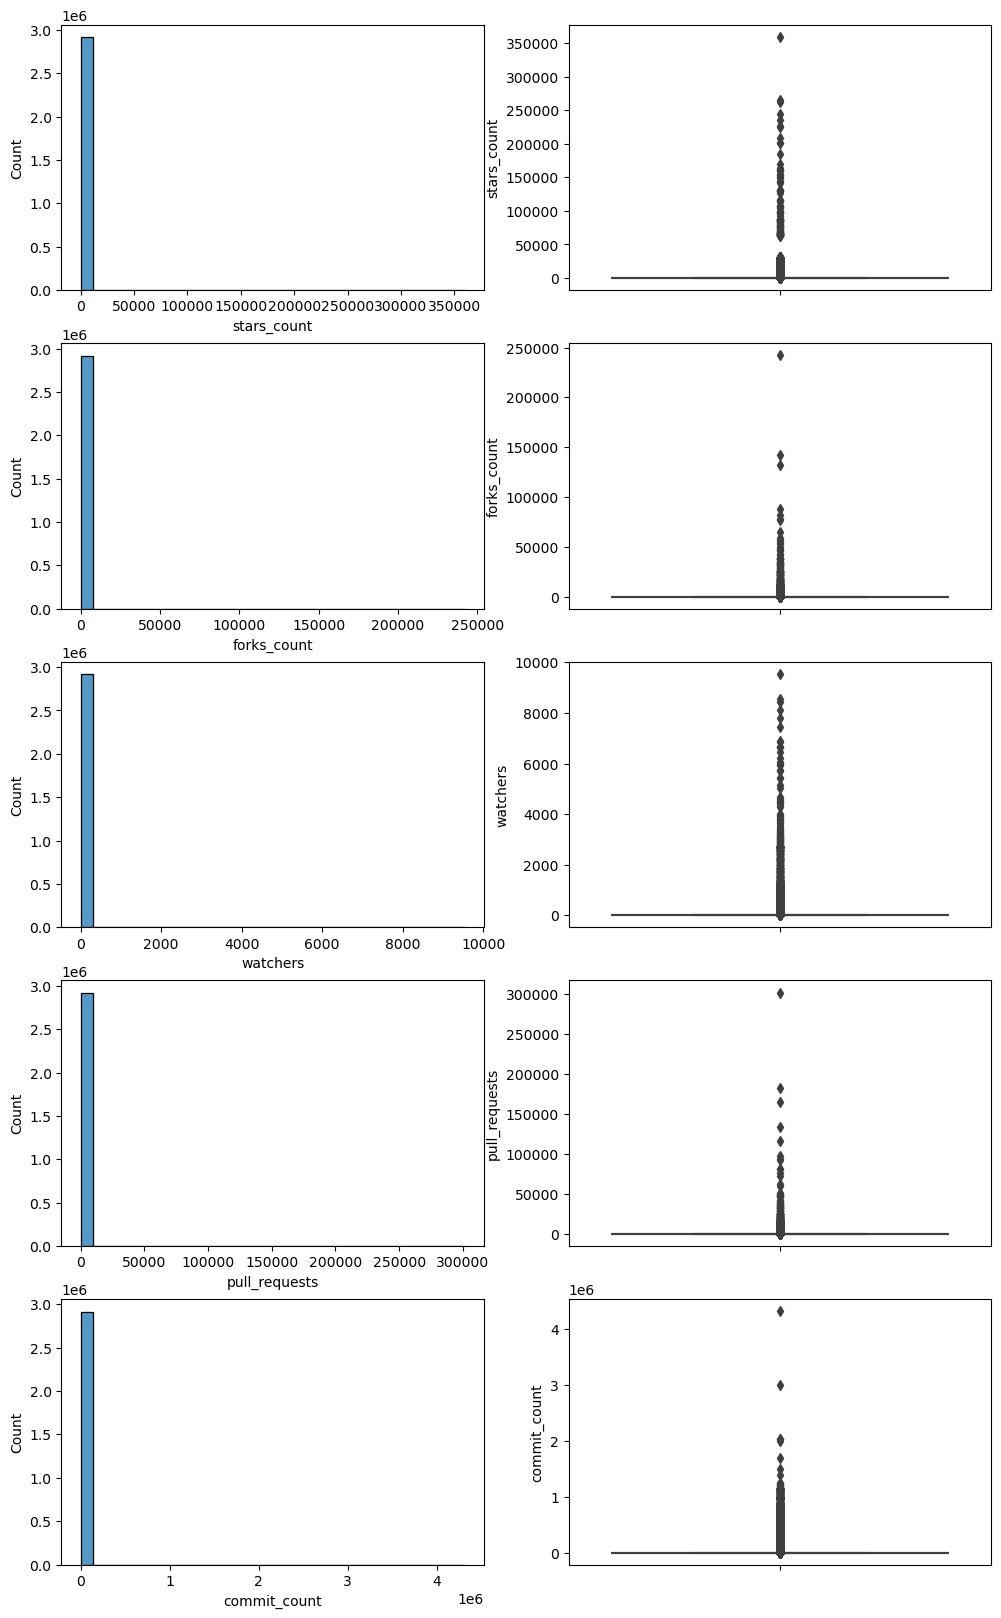

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# 可视化
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
sns.histplot(ax=axes[0, 0], data=repository_data, x='stars_count', bins=30)
sns.boxplot(ax=axes[0, 1], data=repository_data, y='stars_count')
sns.histplot(ax=axes[1, 0], data=repository_data, x='forks_count', bins=30)
sns.boxplot(ax=axes[1, 1], data=repository_data, y='forks_count')
sns.histplot(ax=axes[2, 0], data=repository_data, x='watchers', bins=30)
sns.boxplot(ax=axes[2, 1], data=repository_data, y='watchers')
sns.histplot(ax=axes[3, 0], data=repository_data, x='pull_requests', bins=30)
sns.boxplot(ax=axes[3, 1], data=repository_data, y='pull_requests')
sns.histplot(ax=axes[4, 0], data=repository_data, x='commit_count', bins=30)
sns.boxplot(ax=axes[4, 1], data=repository_data, y='commit_count')
plt.show()

# 数据缺失的处理

## 将缺失部分剔除

In [20]:
# 读取github_dataset.csv和repository_data.csv数据集
github_data = pd.read_csv('G://archive//github_dataset.csv')
repository_data = pd.read_csv('G://archive//repository_data.csv')
github_data1 = github_data.dropna()
repository_data1 = repository_data.dropna()
# 对比新旧数据集的差异
print(f"github_data原始数据集缺失值数量：\n{github_data.isna().sum()}\n")
print(f"github_data处理后的数据集1（将缺失部分剔除）缺失值数量：\n{github_data1.isna().sum()}\n")
print(f"repository_data原始数据集缺失值数量：\n{repository_data.isna().sum()}\n")
print(f"repository_data处理后的数据集1（将缺失部分剔除）缺失值数量：\n{repository_data1.isna().sum()}\n")

github_data原始数据集缺失值数量：
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

github_data处理后的数据集1（将缺失部分剔除）缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

repository_data原始数据集缺失值数量：
name                     13
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language     218573
languages_used       221984
commit_count           1921
created_at                0
licence             1378200
dtype: int64

repository_data处理后的数据集1（将缺失部分剔除）缺失值数量：
name                0
stars_count         0
forks_count         0
watchers            0
pull_requests       0
primary_language    0
languages_used      0
commit_count        0
created_at          0
licence             0
dtype: int64



## 用最高频率值来填补缺失值

In [21]:
github_data2 = github_data.fillna(github_data.mode().iloc[0])
repository_data2 = repository_data.fillna(repository_data.mode().iloc[0])
# 对比新旧数据集的差异
print(f"github_data原始数据集缺失值数量：\n{github_data.isna().sum()}\n")
print(f"github_data处理后的数据集2（用最高频率值来填补缺失值）缺失值数量：\n{github_data2.isna().sum()}\n")
print(f"repository_data原始数据集缺失值数量：\n{repository_data.isna().sum()}\n")
print(f"repository_data处理后的数据集2（将缺失部分剔除）缺失值数量：\n{repository_data1.isna().sum()}\n")

github_data原始数据集缺失值数量：
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

github_data处理后的数据集2（用最高频率值来填补缺失值）缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

repository_data原始数据集缺失值数量：
name                     13
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language     218573
languages_used       221984
commit_count           1921
created_at                0
licence             1378200
dtype: int64

repository_data处理后的数据集2（将缺失部分剔除）缺失值数量：
name                0
stars_count         0
forks_count         0
watchers            0
pull_requests       0
primary_language    0
languages_used      0
commit_count        0
created_at          0
licence             0
dtype: int64



## 通过属性的相关关系来填补缺失值
<p>使用线性回归模型来建立属性之间的关系，并用已知数据来进行预测</p>

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
github_data = pd.read_csv('G://archive//github_dataset.csv')
repository_data = pd.read_csv('G://archive//repository_data.csv')
correlated_features = ['forks_count', 'pull_requests', 'contributors']
correlated_features1 = ['forks_count', 'stars_count', 'watchers']
github_data3 = pd.read_csv('G://archive//github_dataset.csv')
repository_data3 = pd.read_csv('G://archive//repository_data.csv')
label_encoder = LabelEncoder()
github_data3['language'] = label_encoder.fit_transform(github_data3['language'])

# 创建一个线性回归模型来预测缺失值
model = LinearRegression()

# 用相关属性的数据进行拟合
model.fit(github_data3[correlated_features].dropna(), github_data3['language'].dropna())
github_data3.loc[github_data3['language'] == 51, 'language'] = pd.NA
# 用模型预测缺失值
predicted_values = model.predict(github_data3[correlated_features][github_data3['language'].isnull()])

# 将预测值填充到缺失值所在的位置
github_data3.loc[github_data3['language'].isnull(), 'language'] = predicted_values

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()

repository_data3['name'] = label_encoder1.fit_transform(repository_data3['name'])
print(repository_data3['primary_language'])
repository_data3['primary_language'] = label_encoder2.fit_transform(repository_data3['primary_language'])
print(repository_data3['primary_language'])

print(repository_data3['languages_used'])
repository_data3['languages_used'] = label_encoder3.fit_transform(repository_data3['languages_used'])
print(repository_data3['languages_used'])

print(repository_data3['licence'])
repository_data3['licence'] = label_encoder4.fit_transform(repository_data3['licence'])
print(repository_data3['licence'])

print(repository_data3['commit_count'])
repository_data3['commit_count'] = label_encoder5.fit_transform(repository_data3['commit_count'])
print(repository_data3['commit_count'])

# 创建一个线性回归模型来预测缺失值
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
# 用相关属性的数据进行拟合
model1.fit(repository_data3[correlated_features1].dropna(), repository_data3['name'].dropna())
repository_data3.loc[repository_data3['name'] == 13, 'name'] = pd.NA
# 用模型预测缺失值
predicted_values = model1.predict(repository_data3[correlated_features1][repository_data3['name'].isnull()])
# 将预测值填充到缺失值所在的位置
repository_data3.loc[repository_data3['name'].isnull(), 'name'] = predicted_values

# 用相关属性的数据进行拟合
model2.fit(repository_data3[correlated_features1].dropna(), repository_data3['primary_language'].dropna())
repository_data3.loc[repository_data3['primary_language'] == 497, 'primary_language'] = pd.NA
# 用模型预测缺失值
predicted_values = model2.predict(repository_data3[correlated_features1][repository_data3['primary_language'].isnull()])
# 将预测值填充到缺失值所在的位置
repository_data3.loc[repository_data3['primary_language'].isnull(), 'primary_language'] = predicted_values

# 用相关属性的数据进行拟合
model3.fit(repository_data3[correlated_features1].dropna(), repository_data3['languages_used'].dropna())
repository_data3.loc[repository_data3['languages_used'] == 328148, 'languages_used'] = pd.NA
# 用模型预测缺失值
predicted_values = model3.predict(repository_data3[correlated_features1][repository_data3['languages_used'].isnull()])
# 将预测值填充到缺失值所在的位置
repository_data3.loc[repository_data3['languages_used'].isnull(), 'languages_used'] = predicted_values

# 用相关属性的数据进行拟合
model4.fit(repository_data3[correlated_features1].dropna(), repository_data3['licence'].dropna())
repository_data3.loc[repository_data3['licence'] == 46, 'licence'] = pd.NA
# 用模型预测缺失值
predicted_values = model4.predict(repository_data3[correlated_features1][repository_data3['licence'].isnull()])
# 将预测值填充到缺失值所在的位置                                                                                   
repository_data3.loc[repository_data3['licence'].isnull(), 'licence'] = predicted_values

model5.fit(repository_data3[correlated_features1].dropna(), repository_data3['commit_count'].dropna())
repository_data3.loc[repository_data3['commit_count'] == 46, 'commit_count'] = pd.NA
# 用模型预测缺失值
predicted_values = model5.predict(repository_data3[correlated_features1][repository_data3['commit_count'].isnull()])
# 将预测值填充到缺失值所在的位置                                                                                   
repository_data3.loc[repository_data3['commit_count'].isnull(), 'commit_count'] = predicted_values

print(f"github_data原始数据集缺失值数量：\n{github_data.isna().sum()}\n")
print(f"github_data3处理后的数据集3缺失值数量：\n{github_data3.isna().sum()}\n")
print(f"repository_data原始数据集缺失值数量：\n{repository_data.isna().sum()}\n")
print(f"repository_data3处理后的数据集3缺失值数量：\n{repository_data3.isna().sum()}\n")

0          TypeScript
1                 NaN
2                 NaN
3                 NaN
4                 NaN
              ...    
2917946          HTML
2917947           C++
2917948    JavaScript
2917949           NaN
2917950         Scala
Name: primary_language, Length: 2917951, dtype: object
0          429
1          497
2          497
3          497
4          497
          ... 
2917946    173
2917947     59
2917948    202
2917949    497
2917950    385
Name: primary_language, Length: 2917951, dtype: int32
0          ['TypeScript', 'JavaScript', 'CSS', 'Shell', '...
1                                                        NaN
2                                                        NaN
3                                                        NaN
4                                                        NaN
                                 ...                        
2917946          ['HTML', 'C++', 'TypeScript', 'JavaScript']
2917947                                         ['C++', '

## 通过数据对象之间的相似性来填补缺失值
<p>将数值属性转化为向量，根据两个向量之间的相似性来填补缺失值</p>

In [112]:
import pandas as pd
from sklearn.impute import KNNImputer
from difflib import SequenceMatcher
from scipy.spatial.distance import euclidean
# 读取数据
data = pd.read_csv('G://archive//github_dataset.csv')
print(f"github_data原始数据集缺失值数量：\n{data.isna().sum()}\n")
# 定义一个函数来计算字符串之间的相似性（编辑距离）
def similarity(s1, s2):
    return SequenceMatcher(None, s1, s2).ratio()

# 定义一个函数来填补 'language' 列的缺失值
def fill_missing_language(row):
    if pd.isna(row['language']):
        similarities = [(similarity(str(row['contributors']), str(other_row['contributors'])), other_row['language']) for idx, other_row in data.iterrows() if not pd.isna(other_row['language'])]
        most_similar = max(similarities, key=lambda x: x[0], default=(0, None))
        return most_similar[1] if most_similar[1] is not None else row['language']
    else:
        return row['language']
# 填补 'language' 列的缺失值
data['language'] = data.apply(fill_missing_language, axis=1)
print(f"github_data3处理后的数据集4缺失值数量：\n{data.isna().sum()}\n")

data1 = pd.read_csv('G://archive//repository_data.csv')
print(f"repository_data原始数据集缺失值数量：\n{data1.isna().sum()}\n")
# 确定需要使用的属性
attributes = ['stars_count', 'forks_count', 'watchers', 'pull_requests']
# 创建 KNN 填充器对象
imputer = KNNImputer(n_neighbors=5, metric=euclidean)
# 选取有缺失值的行
missing_data = data1[data1['name'].isnull()]
# 填充 'name' 属性的缺失值
for idx, row in missing_data.iterrows():
    # 计算与当前行的距离
    distances = []
    for _, other_row in data1.iterrows():
        if not pd.isna(other_row['name']):
            distance = euclidean(row[attributes], other_row[attributes])
            distances.append((distance, other_row['name']))
    
    # 根据距离排序，并选择最相似的行的 'name' 值
    most_similar = min(distances, key=lambda x: x[0], default=(float('inf'), None))
    data1.loc[idx, 'name'] = most_similar[1]
print(f"repository_data处理后的数据集缺失值数量：\n{data1.isna().sum()}\n")


github_data原始数据集缺失值数量：
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

github_data3处理后的数据集4缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

repository_data原始数据集缺失值数量：
name                     13
stars_count               0
forks_count               0
watchers                  0
pull_requests             0
primary_language     218573
languages_used       221984
commit_count           1921
created_at                0
licence             1378200
dtype: int64

repository_data处理后的数据集缺失值数量：
name                0
stars_count         0
forks_count         0
watchers            0
pull_requests       0
primary_language    0
languages_used      0
commit_count        0
created_at          0
licence             0
dtype: int64



# **对MovieLens 10M Dataset数据集的处理**

## 加载所需要的python库和数据集
<p>加载电影信息数据集和电影评分这连个数据集。其中，movies_df数据集包括了电影的编号、标题和类型三个属性，ratings_df数据集包括了用户编号、电影编号、评分、时间戳四个属性。在读取电影信息数据集时，通过header=None参数指定文件中没有标题行，因此需要手动指定列名；同时，通过sep='::'参数指定分隔符为双冒号。</p>

In [117]:
# 将python中读取文件的库加载进来，并使用简称来使用
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# 忽略警告
warnings.filterwarnings('ignore')
# 加载下载在本地的github数据集
movies_data  = pd.read_csv('G://archive1//ml-10M100K/movies.dat', sep='::', engine='python', header=None, names=['movieId', 'title', 'genres'])
ratings_data = pd.read_csv('G://archive1//ml-10M100K/ratings.dat', sep='::', engine='python', header=None, names=['userId', 'movieId', 'rating'])

## 数据摘要
### *数据集的形状*

In [118]:
print("movies_data.csv的形状：", movies_data.shape)
print("ratings_data.csv的形状：", ratings_data.shape)

movies_data.csv的形状： (10681, 3)
ratings_data.csv的形状： (10000054, 3)


In [121]:
# 标称属性的频数统计
print("电影类型标称属性频数统计：")
print(movies_data['genres'].value_counts())
print(movies_data['title'].value_counts())

print("电影类型数值属性频数统计：")
print(movies_data.describe())
print(movies_data.isnull().sum())

# 数值属性的五数概括及缺失值个数
print("\n电影评分数值属性五数概括：")
print(ratings_data.describe())

print("\n电影评分数值属性缺失值个数：")
print(ratings_data.isnull().sum())

电影类型标称属性频数统计：
genres
Drama                                      1817
Comedy                                     1047
Comedy|Drama                                551
Drama|Romance                               412
Comedy|Romance                              379
                                           ... 
Animation|Fantasy|Horror                      1
Action|Fantasy|Mystery|Thriller               1
Action|Adventure|Romance|Thriller             1
Documentary|Drama|Romance|War                 1
Action|Adventure|Fantasy|Horror|Romance       1
Name: count, Length: 797, dtype: int64
title
War of the Worlds (2005)                                                2
Last Tycoon, The (1976)                                                 1
Money for Nothing (1993)                                                1
Silencers, The (1966)                                                   1
Where Angels Go, Trouble Follows (1968)                                 1
                                    

### 使用直方图和盒图分别对电影类型和电影评分进行数据分布展示

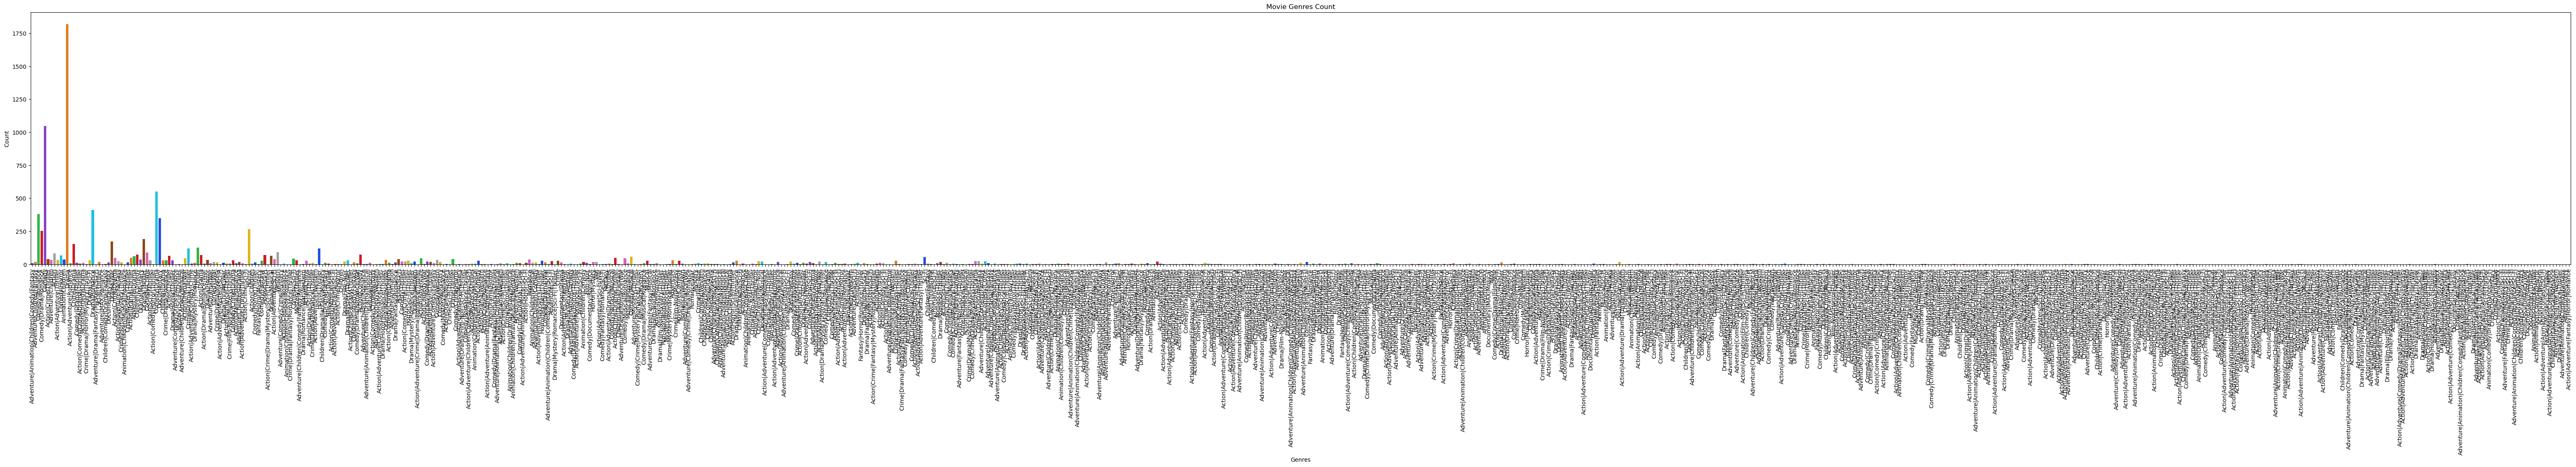

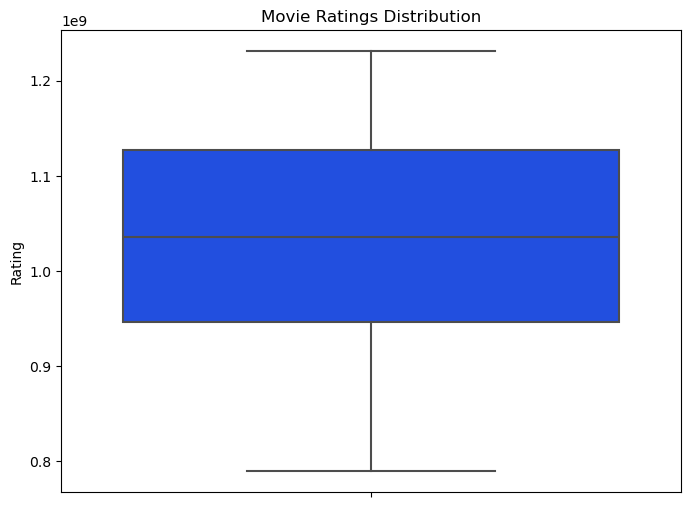

In [125]:
# 电影类型直方图
plt.figure(figsize=(80,8))
sns.countplot(x='genres', data=movies_data, palette='bright')
plt.title("Movie Genres Count")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# 电影评分盒图
plt.figure(figsize=(8,6))
sns.boxplot(y='rating', data=ratings_data, palette='bright')
plt.title("Movie Ratings Distribution")
plt.ylabel("Rating")
plt.show()

## 由于这两个数据集没有缺失值，所以未做缺失值处理